In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train = np.array([[1.1], [2.2], [3.3], [4.4], [5.5], [6.5], [7.2], [8.8], [9.4], [10.6]], dtype=np.float32)
X_train

array([[ 1.1],
       [ 2.2],
       [ 3.3],
       [ 4.4],
       [ 5.5],
       [ 6.5],
       [ 7.2],
       [ 8.8],
       [ 9.4],
       [10.6]], dtype=float32)

In [4]:
X_test = np.array([[1.0], [2.0], [3.0], [4.0], [5.0]], dtype=np.float32)
X_test

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.]], dtype=float32)

In [5]:
Y_train = np.array([[2.2], [3.5], [4.7], [5.9], [6.3], [7.4], [8.1], [9.7], [10.5], [11.7]], dtype=np.float32)
Y_train

array([[ 2.2],
       [ 3.5],
       [ 4.7],
       [ 5.9],
       [ 6.3],
       [ 7.4],
       [ 8.1],
       [ 9.7],
       [10.5],
       [11.7]], dtype=float32)

In [6]:
Y_test = np.array([[2.0, 3.0, 4.0, 5.0, 6.0]], dtype=np.float32)
Y_test

array([[2., 3., 4., 5., 6.]], dtype=float32)

### Visualizing the data

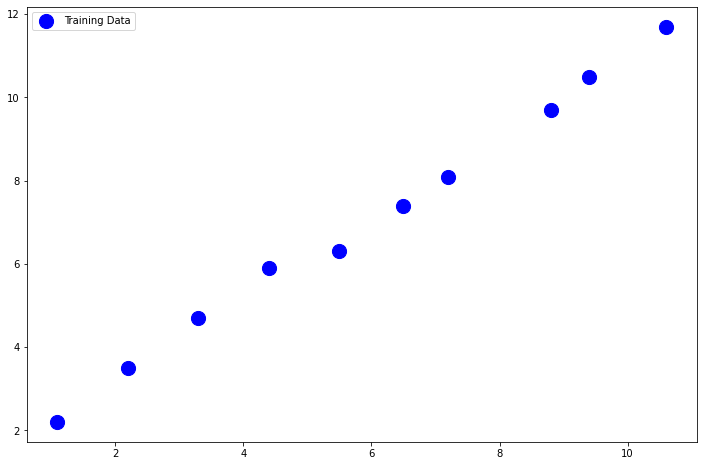

In [7]:
plt.figure(figsize= (12,8))

plt.scatter(X_train, Y_train, label="Training Data", c="b", s=200)

plt.legend()
plt.show()

In [25]:
import torch

In [26]:
X_train_tensor = torch.from_numpy(X_train)
Y_train_tensor = torch.from_numpy(Y_train)

### Network layer size

In [27]:
input_size = 1
hidden_size = 10
output_size = 1

### Network architecture

In [28]:
model = torch.nn.Sequential(
        torch.nn.Linear(input_size, hidden_size),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_size, output_size))

### Defining loss function

In [29]:
loss_fn = torch.nn.MSELoss(reduction='sum')

### Training

In [30]:
learning_rate = 1e-5
for iter in range(1,10001):
    Y_pred = model(X_train_tensor)
    
    loss = loss_fn(Y_pred, Y_train_tensor)
    if iter % 1000 == 0:
        print(iter, loss.item())
    
    model.zero_grad()
    
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

1000 2.552039861679077
2000 2.089986562728882
3000 1.7306562662124634
4000 1.4554638862609863
5000 1.238535761833191
6000 1.066145896911621
7000 0.9289859533309937
8000 0.819819986820221
9000 0.7329540848731995
10000 0.663872241973877


### Prediction

In [31]:
X_test_tensor = torch.from_numpy(X_test)
Y_predicted = model(X_test_tensor).detach().numpy()
Y_predicted

array([[1.954093 ],
       [2.9690914],
       [3.9842522],
       [4.999413 ],
       [6.014574 ]], dtype=float32)

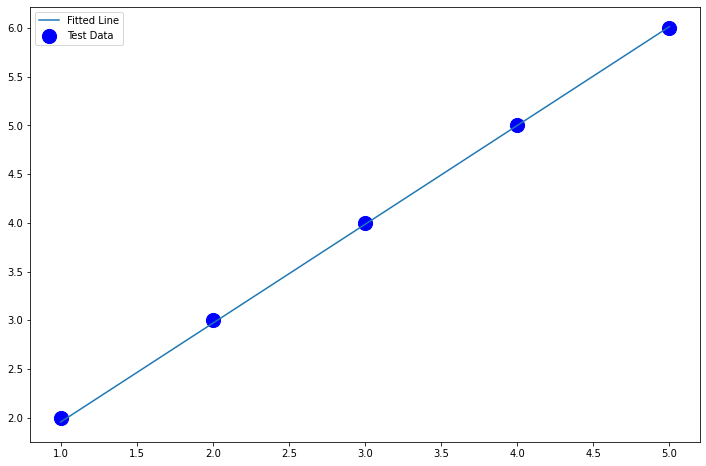

In [32]:
plt.figure(figsize=(12,8))

plt.scatter(X_test, Y_test, c="b", s=200, label="Test Data")
plt.plot(X_test, Y_predicted, label="Fitted Line")

plt.legend()
plt.show()

## Using optimizer

In [37]:
model = torch.nn.Sequential(
        torch.nn.Linear(input_size, hidden_size),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_size, output_size))
loss_fn = torch.nn.MSELoss(reduction='sum')

In [38]:
learning_rate = 1e-5

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for iter in range(1,10001):
    Y_pred = model(X_train_tensor)
    
    loss = loss_fn(Y_pred, Y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

1000 3.7014758586883545
2000 2.8929426670074463
3000 2.257807731628418
4000 1.7783117294311523
5000 1.4237898588180542
6000 1.1529484987258911
7000 0.9473470449447632
8000 0.7922960519790649
9000 0.676135778427124
10000 0.5914801955223083


In [39]:
Y_predicted = model(X_test_tensor).detach().numpy()
Y_predicted

array([[1.9306474],
       [2.9659925],
       [4.037732 ],
       [5.0577335],
       [6.056651 ]], dtype=float32)

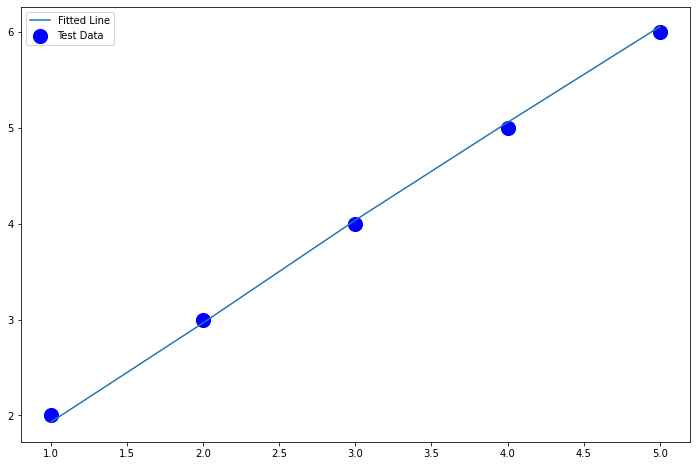

In [40]:
plt.figure(figsize=(12,8))

plt.scatter(X_test, Y_test, c="b", s=200, label="Test Data")
plt.plot(X_test, Y_predicted, label="Fitted Line")

plt.legend()
plt.show()